<a href="https://colab.research.google.com/github/apoorvavinod46/The-Sparks-Foundation-Internship/blob/main/Task6_Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THE SPARKS FOUNDATION**
**#GRIPMAY21**

**Author: APOORVA VINOD, DATA SCIENCE & BUSINESS ANALYTICS INTERN**

**Task-6 Prediction using Decision Tree Algorithm(Level-Intermediate)**


Problem statement: Create the Decision Tree classifier and visualize it graphically.The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Dataset: : https://bit.ly/3kXTdox

**Importing Libraries and loading iris dataset**

In [3]:
# Importing the required Libraries

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import pydot
from IPython.display import Image



**Loading the Dataset**

In [4]:
# Loading Dataset
iris = load_iris()
X=iris.data[:,:] 
y=iris.target

**Exploratory Data Analysis**

In [5]:
#Input data 

data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
data.shape

(150, 5)

In [8]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Data Visualization comparing various features**

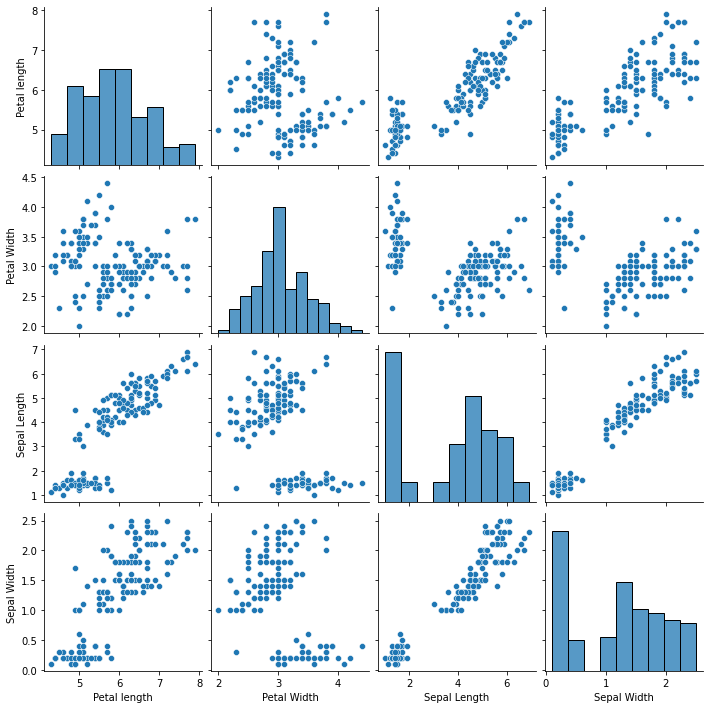

In [9]:
# Input data Visualization
sns.pairplot(data)

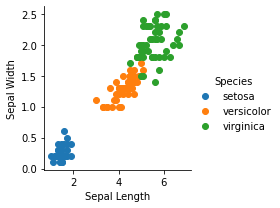

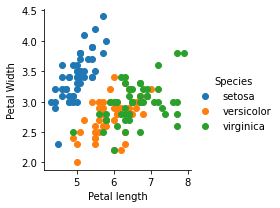

In [10]:
# Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Petal length','Petal Width').add_legend()
plt.show()

**Decision Tree Model Training**

In [12]:
# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
print("Training Complete.")
y_pred = tree_classifier.predict(X_test)

Training Complete.


**Comparing the actual and predicted flower classification**

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


**Visualizing the Trained Model**

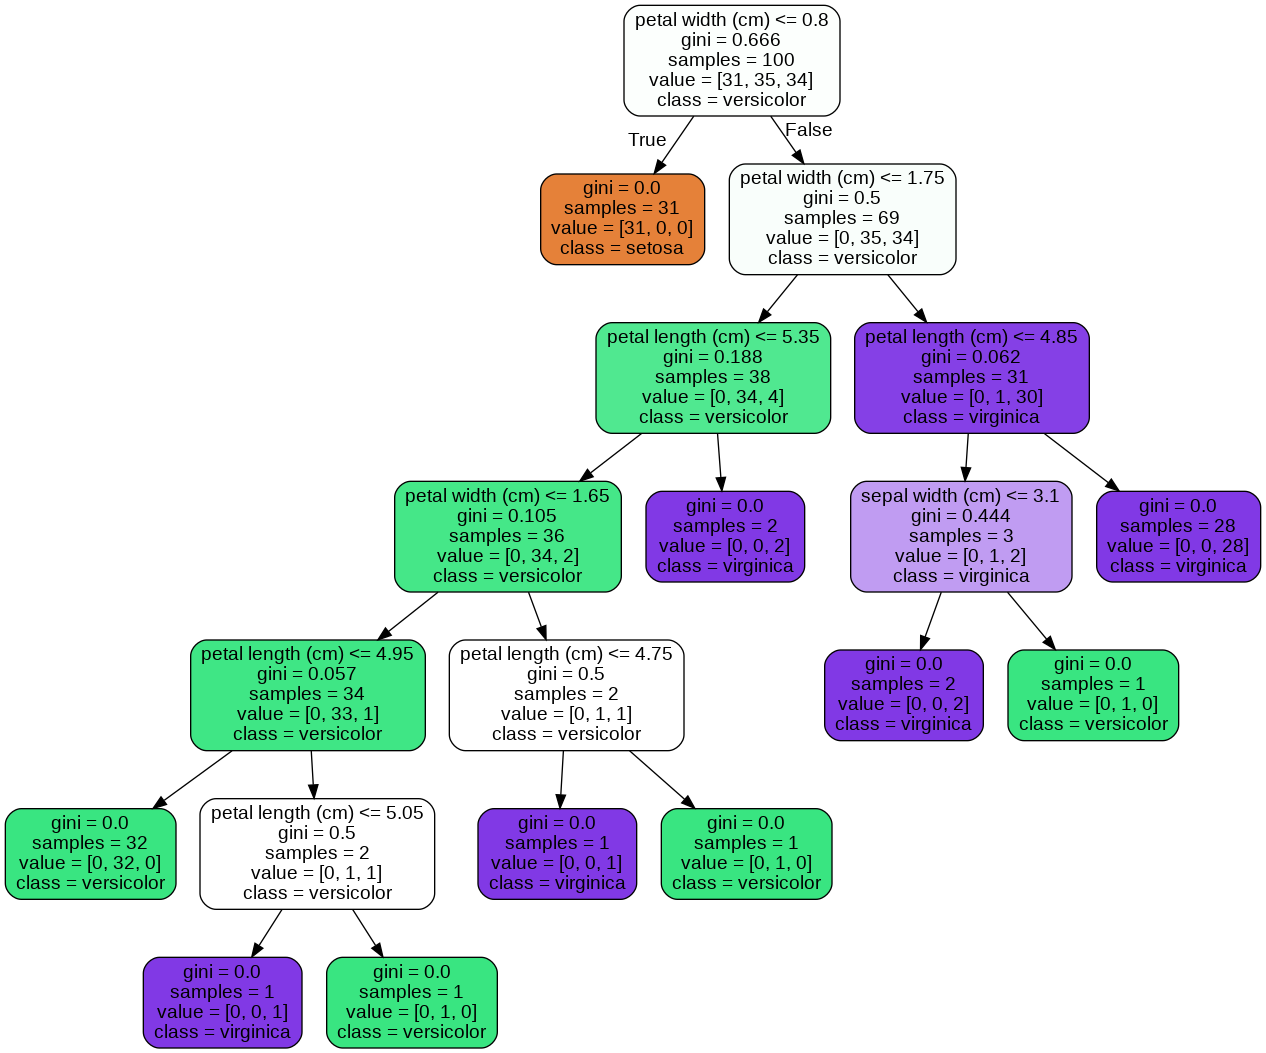

In [16]:
#Visualizing the trained Decision Tree Classifier taking all 4 features in consideration

export_graphviz(
        tree_classifier,
        out_file="img\desision_tree.dot",
        feature_names=iris.feature_names[:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
)

(graph,) = pydot.graph_from_dot_file('img\desision_tree.dot')
graph.write_png('img\desision_tree.png')

Image(filename='img\desision_tree.png')

                                    **OR**

**Import the DecisionTreeClassifier and fit the model**

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)


print('Decision Tree Classifer Created Successfully')

Decision Tree Classifer Created Successfully


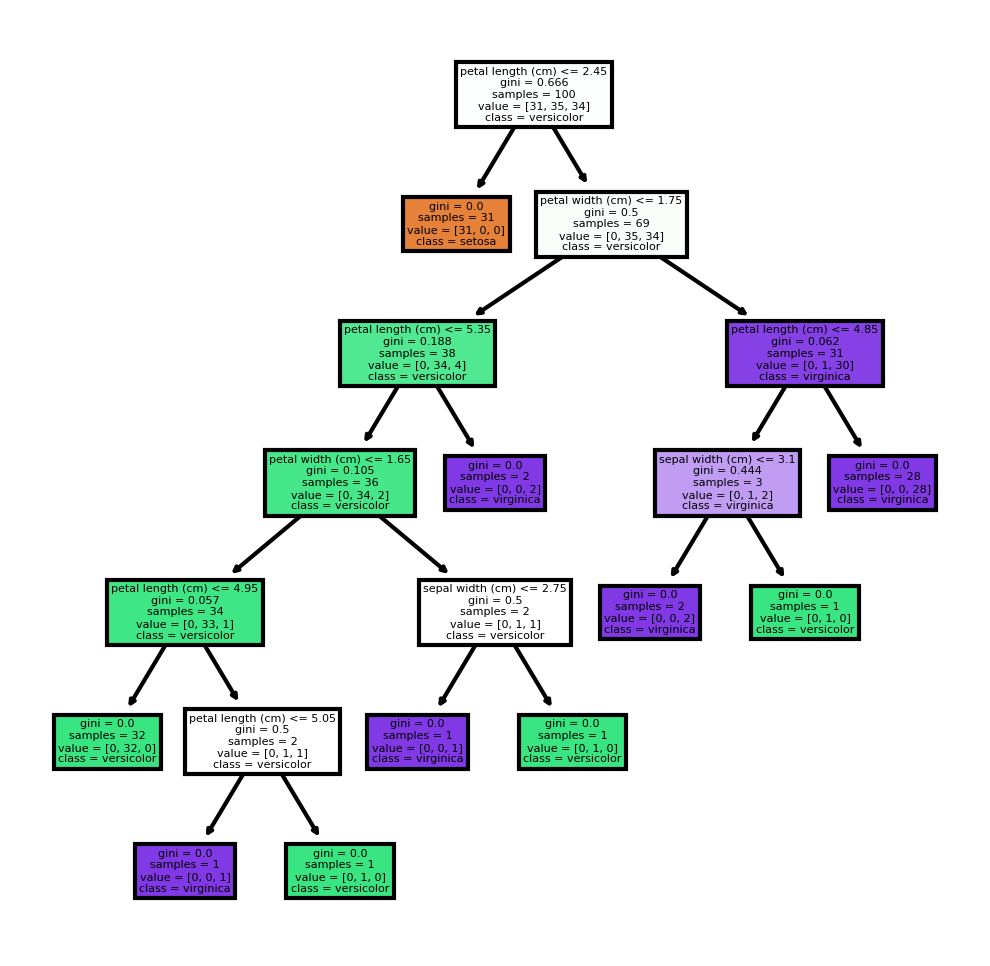

In [20]:
import matplotlib.pyplot as plt
from sklearn import tree


a=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
b=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(dtree, feature_names = a, class_names = b, filled = True);

**Predicting the class output for some random values of petal and sepal length and width**

In [17]:
print("Class Names = ",iris.target_names)

# Estimating class probabilities
print()
print("Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. ")
print()
print('Output = ',tree_classifier.predict([[4.7, 3.2, 1.3, 0.2]]))
print()
print("Our model predicts the class as 0, that is, setosa.")

Class Names =  ['setosa' 'versicolor' 'virginica']

Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. 

Output =  [0]

Our model predicts the class as 0, that is, setosa.


**Calculating the Model accuracy**

In [18]:
# Model Accuracy
print("Accuracy:",sm.accuracy_score(y_test, y_pred))

Accuracy: 0.98


**Conclusion**


**I was able to successfully carry-out prediction using Prediction using Decision Tree Algorithm and was able to evaluate the model's accuracy score.**

**Thank You**